In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

In [2]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [3]:
URL = r"https://www.dropbox.com/s/0oe92zziik5mwhf/opencv_bootcamp_assets_NB4.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB4.zip")

# Download if assest ZIP does not exists.
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)

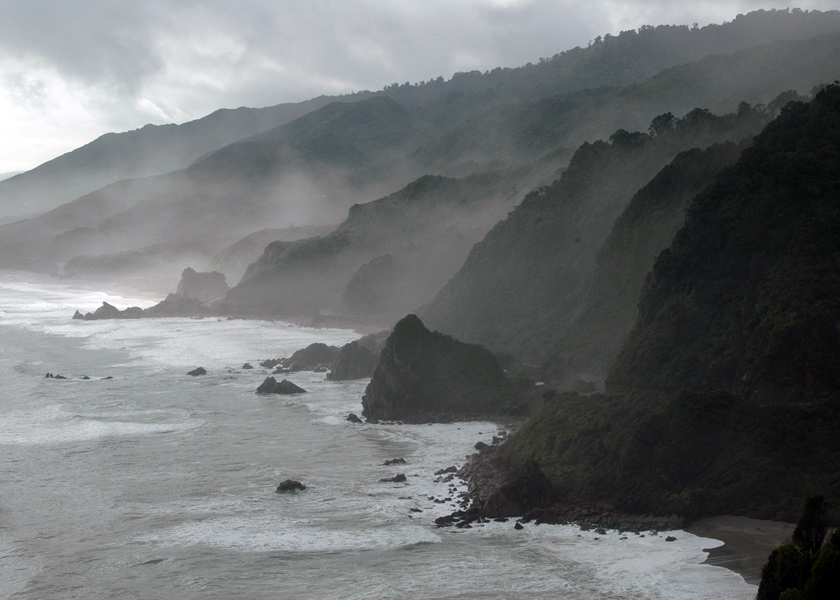

In [4]:
img_bgr = cv2.imread("New_Zealand_Coast.jpg", cv2.IMREAD_COLOR)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
Image(filename='New_Zealand_Coast.jpg')

Text(0.5, 1.0, 'Darker')

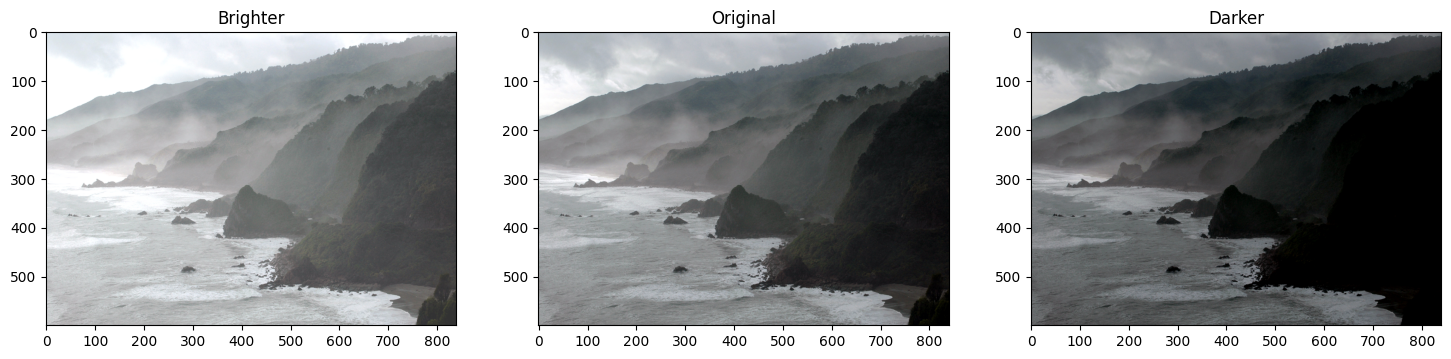

In [6]:
matrix = np.ones(img_rgb.shape, dtype="uint8") * 50

img_rgb_brighter = cv2.add(img_rgb, matrix)
img_rgb_darker = cv2.subtract(img_rgb, matrix)

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_brighter); plt.title("Brighter")
plt.subplot(132); plt.imshow(img_rgb); plt.title("Original")
plt.subplot(133); plt.imshow(img_rgb_darker); plt.title("Darker")


### Contrast

Text(0.5, 1.0, 'Higher Contrast')

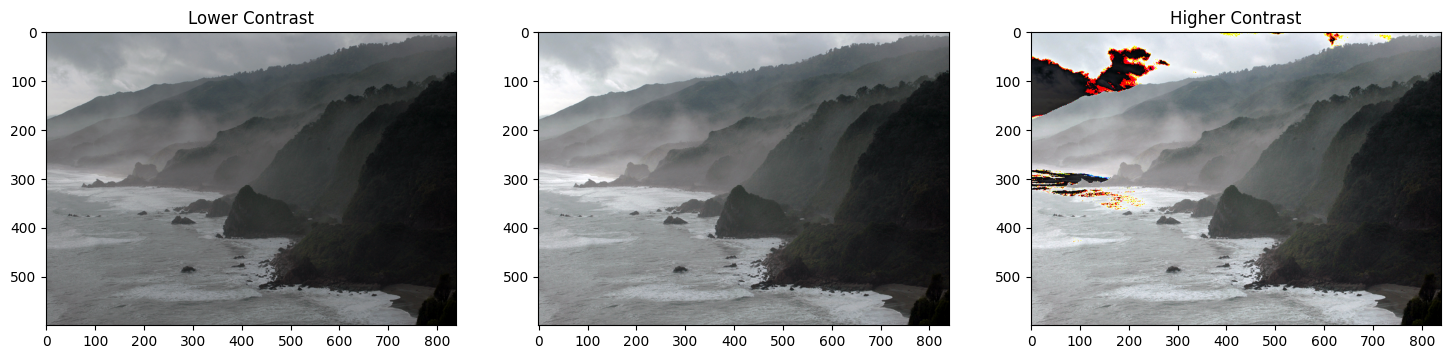

In [7]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2 #May get values above 255

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(cv2.multiply(np.float64(img_rgb), matrix2))

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb)
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast")

### Handling values overflow

Text(0.5, 1.0, 'Higher Contrast')

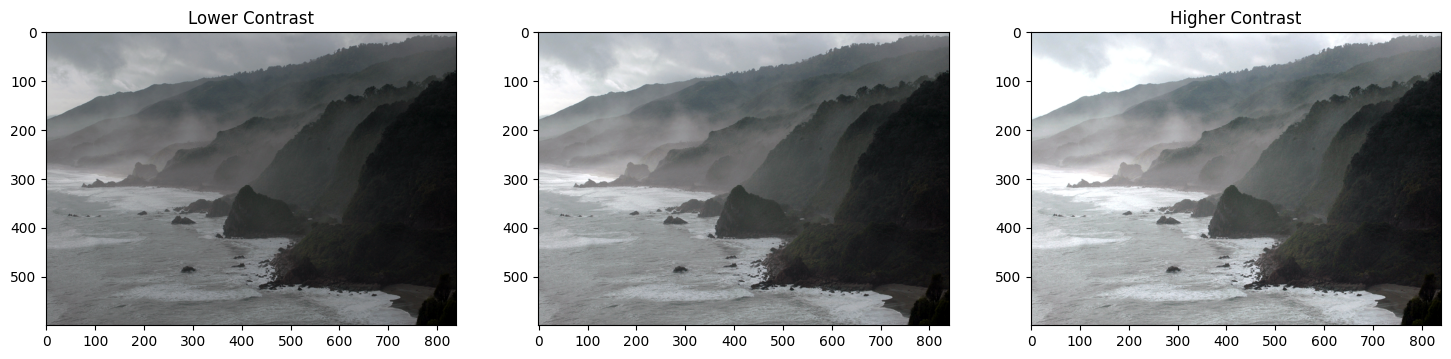

In [8]:
matrix1 = np.ones(img_rgb.shape) * .8
matrix2 = np.ones(img_rgb.shape) * 1.2 #May get values above 255

img_rgb_darker = np.uint8(cv2.multiply(np.float64(img_rgb), matrix1))
img_rgb_brighter = np.uint8(np.clip(cv2.multiply(np.float64(img_rgb), matrix2),0, 255))

plt.figure(figsize=[18,5])
plt.subplot(131); plt.imshow(img_rgb_darker); plt.title("Lower Contrast")
plt.subplot(132); plt.imshow(img_rgb)
plt.subplot(133); plt.imshow(img_rgb_brighter); plt.title("Higher Contrast")

### Image Thresholding

(572, 800)


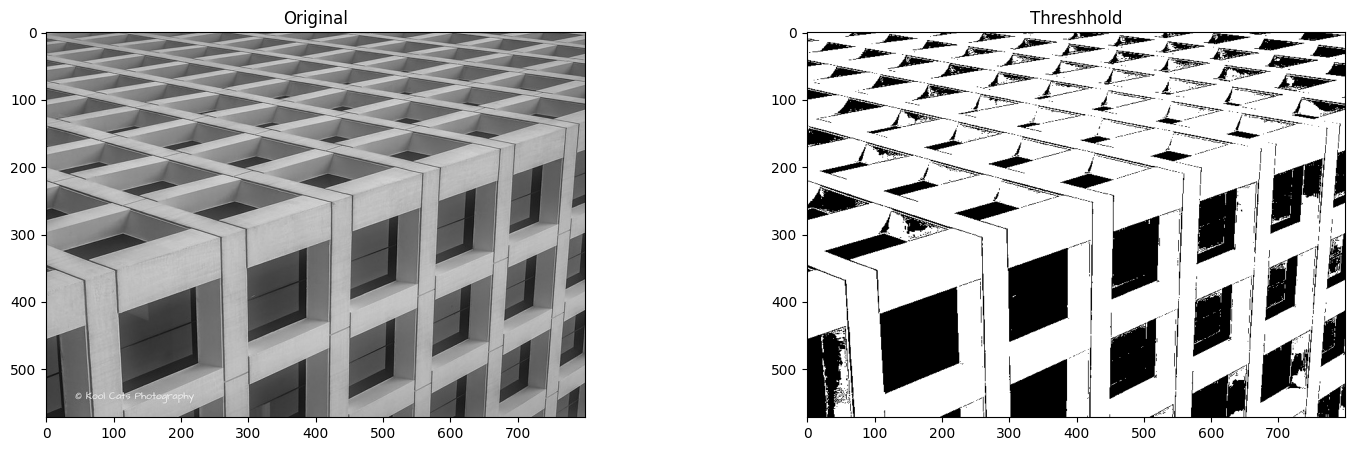

In [9]:
img_read = cv2.imread("building-windows.jpg", cv2.IMREAD_GRAYSCALE)
retval, img_thresh = cv2.threshold(img_read, 100, 255, cv2.THRESH_BINARY)

plt.figure(figsize=[18,5])
plt.subplot(121); plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(122); plt.imshow(img_thresh, cmap='gray'); plt.title('Threshhold')

print(img_thresh.shape)

Text(0.5, 1.0, 'Threshold adaptative')

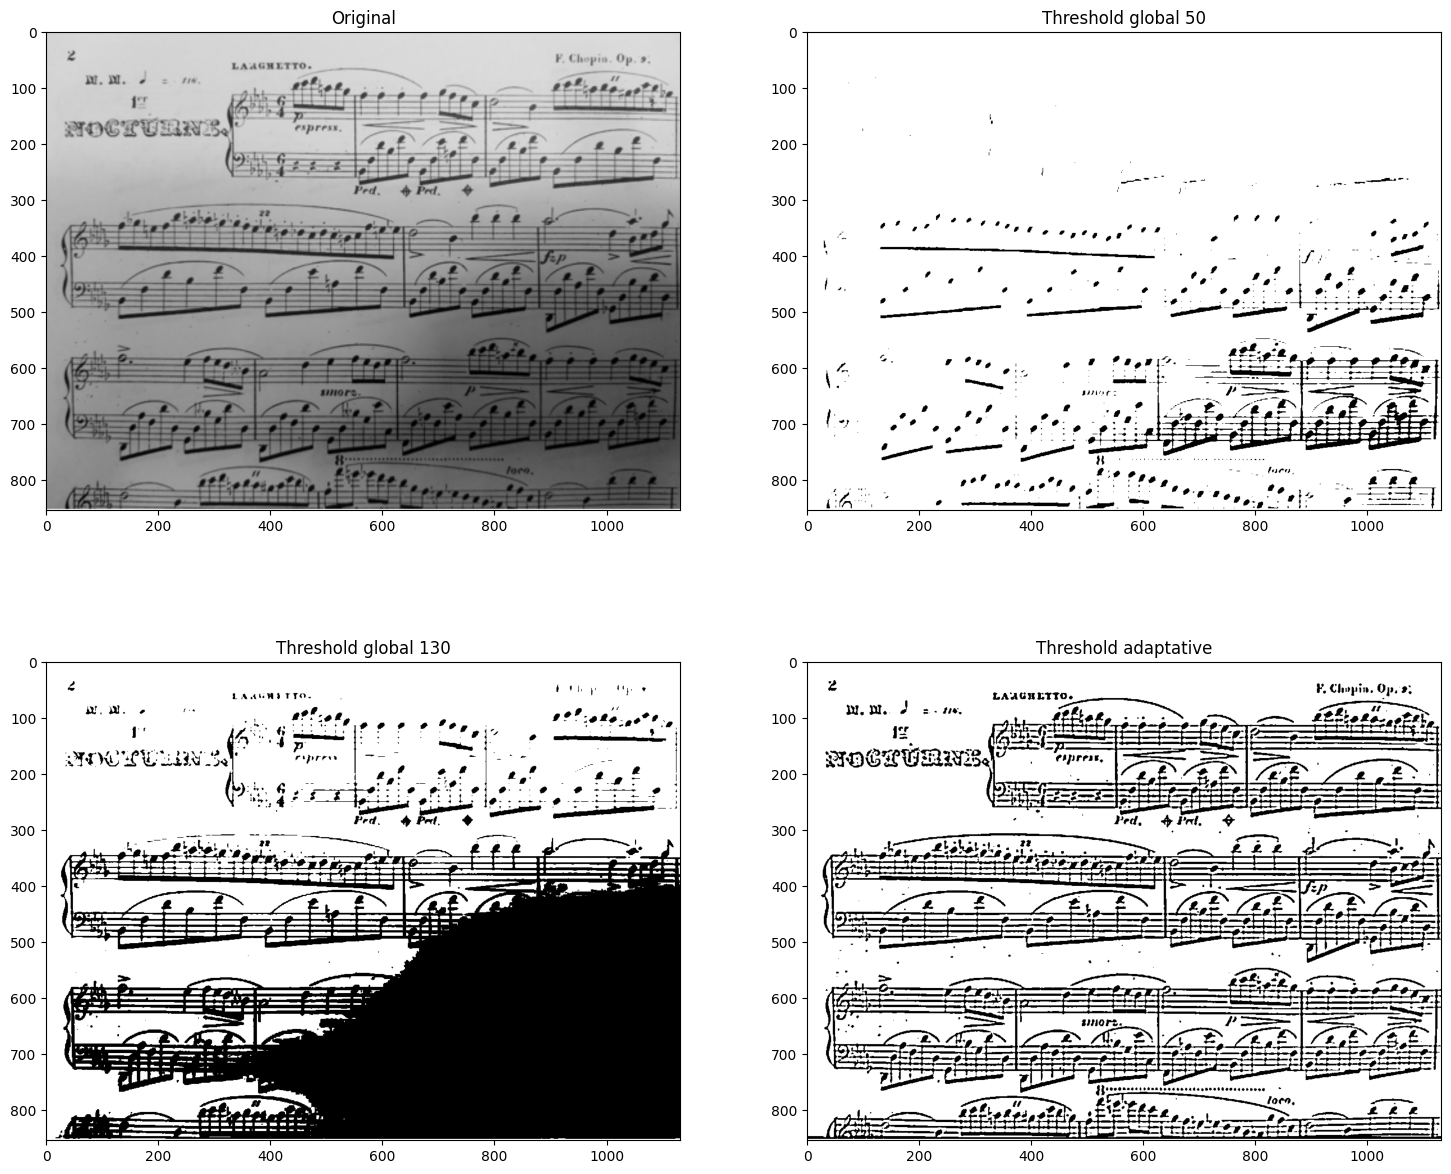

In [10]:
img_read = cv2.imread("Piano_Sheet_Music.png", cv2.IMREAD_GRAYSCALE)

#Global thresholding
retval, img_thresh_gb1 = cv2.threshold(img_read, 50, 255, cv2.THRESH_BINARY)
retval, img_thresh_gb2 = cv2.threshold(img_read, 130, 255, cv2.THRESH_BINARY)
#Adaptative thresholding
img_thresh_adp = cv2.adaptiveThreshold(img_read, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 7)

plt.figure(figsize=[18,15])
plt.subplot(221); plt.imshow(img_read, cmap='gray'); plt.title('Original')
plt.subplot(222); plt.imshow(img_thresh_gb1, cmap='gray'); plt.title("Threshold global 50")
plt.subplot(223); plt.imshow(img_thresh_gb2, cmap='gray'); plt.title("Threshold global 130")
plt.subplot(224); plt.imshow(img_thresh_adp, cmap='gray'); plt.title("Threshold adaptative")

### Bitwise Operations

(200, 499)


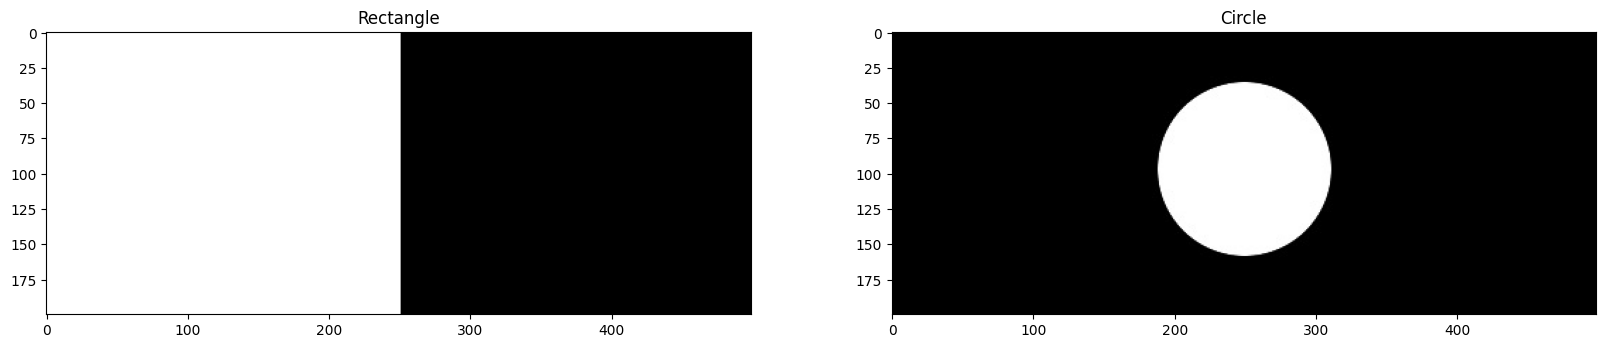

In [11]:
img_rec = cv2.imread("rectangle.jpg", cv2.IMREAD_GRAYSCALE)
img_cir = cv2.imread("circle.jpg", cv2.IMREAD_GRAYSCALE)

plt.figure(figsize=[20,5])
plt.subplot(121); plt.imshow(img_rec , cmap='gray'); plt.title('Rectangle')
plt.subplot(122); plt.imshow(img_cir, cmap='gray'); plt.title('Circle')
print(img_rec.shape)

### Bitwise AND Operator


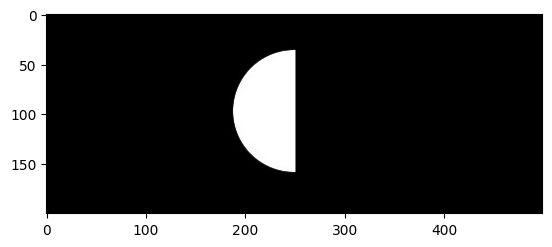

In [12]:
result = cv2.bitwise_and(img_rec, img_cir, mask=None)
plt.imshow(result,cmap='gray')

### Bitwise OR Operator

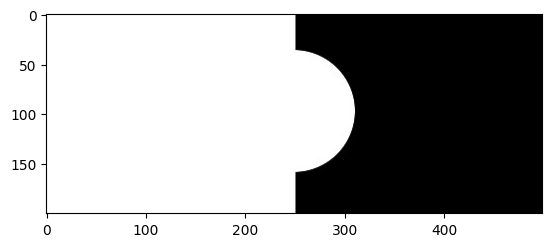

In [13]:
result2 = cv2.bitwise_or(img_rec, img_cir, mask=None)
plt.imshow(result2,cmap='gray')

### Bitwise XOR Operator

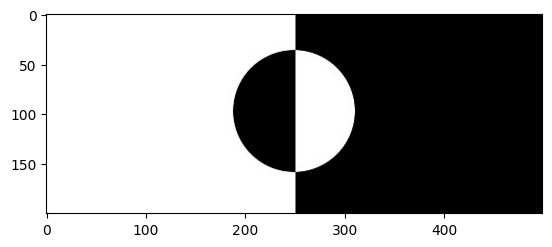

In [14]:
result3 = cv2.bitwise_xor(img_rec, img_cir, mask=None)
plt.imshow(result3,cmap='gray')

### Application: Logo Manipulation

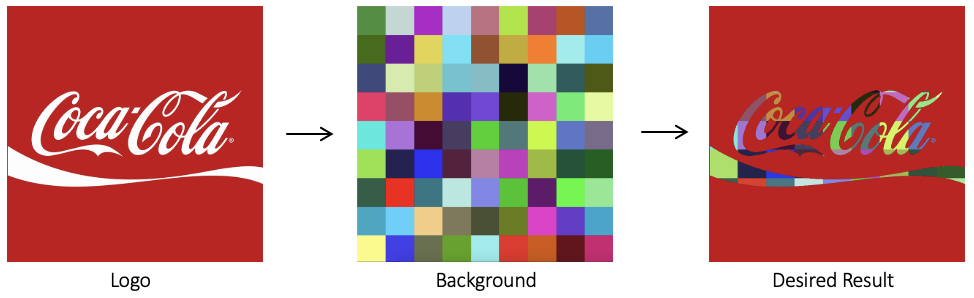

In [15]:
Image(filename='Logo_Manipulation.png')

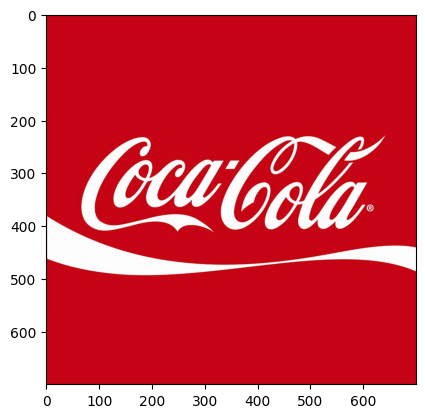

In [16]:
img_bgr = cv2.imread("coca-cola-logo.png")
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
logo_w = img_rgb.shape[0]
logo_h = img_rgb.shape[1]

(700, 700, 3)


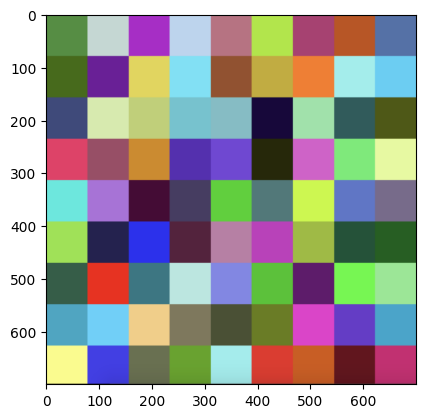

In [17]:
img_background_bgr = cv2.imread("checkerboard_color.png")
img_background_rgb = cv2.cvtColor(img_background_bgr, cv2.COLOR_BGR2RGB)

#Set desired width(logo_w) and maintain image aspect ratio
aspect_ratio = logo_w/img_background_rgb.shape[1]
dim=(logo_w, int(img_background_rgb.shape[0]*aspect_ratio))

#Resize bg image to same size as logo image
img_background_rgb = cv2.resize(img_background_rgb, dim, interpolation=cv2.INTER_AREA)

plt.imshow(img_background_rgb)
print(img_background_rgb.shape)

### Create Mask for Original Image

(700, 700)


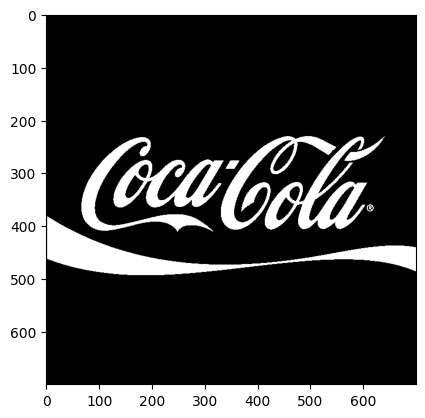

In [18]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2GRAY)

retval, img_mask = cv2.threshold(img_gray, 127, 255, cv2.THRESH_BINARY)
plt.imshow(img_mask, cmap='gray')
print(img_mask.shape)

### Invert the mask

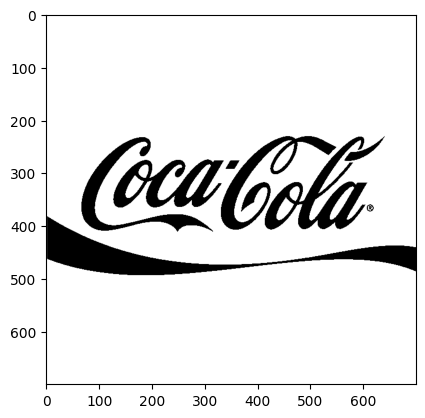

In [20]:
img_mask_inv = cv2.bitwise_not(img_mask)
plt.imshow(img_mask_inv,cmap='gray')

### Apply background on the Mask

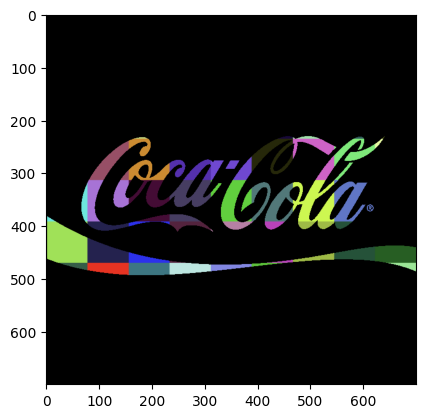

In [21]:
#Create colorful background behind the logo lettering
img_background = cv2.bitwise_and(img_background_rgb, img_background_rgb, mask=img_mask)
plt.imshow(img_background)

### Isolate Foreground

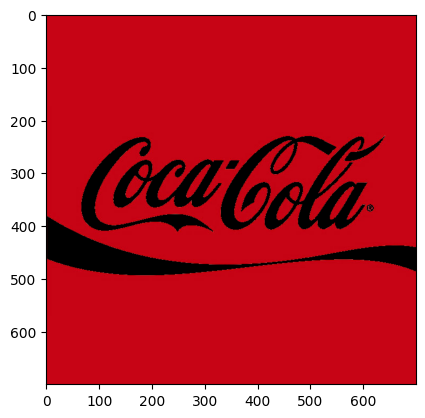

In [22]:
#Isolate foreground (red from original image) using inverse mask
img_foreground = cv2.bitwise_and(img_rgb, img_rgb, mask=img_mask_inv)
plt.imshow(img_foreground)

### Merge Foreground and Background

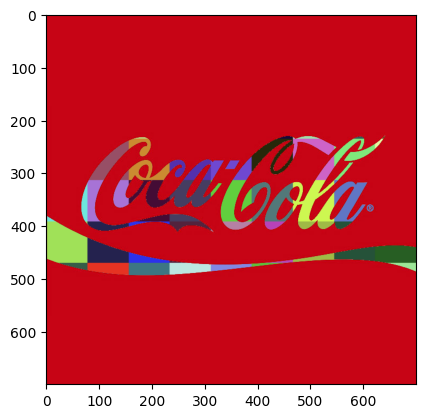

In [23]:
result = cv2.add(img_background, img_foreground)
plt.imshow(result)